In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Outils.dataloader import load_CIFAR10

In [2]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'Dataset/cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [3]:
from set_redundancy_compression import MMD_Encoder

X = X_test
max_im, min_im, Y = MMD_Encoder(X)
Y.shape

(10000, 32, 32, 3)

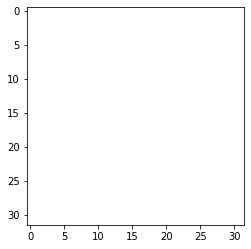

In [73]:
plt.imshow(max_im.astype('uint8'))

In [61]:
# from set_redundancy_compression import MMD_Decoder

# X_decoded = MMD_Decoder(Y, max_im, min_im)

In [84]:
def MMD_Decoder(Y, max_im, min_im):
    '''
    Function to decode the min-max differential 
    Input: Y - set of images encoded of shape N x H x W x C 
    Output: X - set of original images of shape N x H x W x C 
    '''
    X = (Y + min_im)*(2*Y < max_im + min_im) + (max_im - Y)*(2*Y >= max_im + min_im)
    return X

In [85]:
X_decoded = MMD_Decoder(Y, max_im, min_im)

In [81]:
X

array([[[[158., 112.,  49.],
         [159., 111.,  47.],
         [165., 116.,  51.],
         ...,
         [137.,  95.,  36.],
         [126.,  91.,  36.],
         [116.,  85.,  33.]],

        [[152., 112.,  51.],
         [151., 110.,  40.],
         [159., 114.,  45.],
         ...,
         [136.,  95.,  31.],
         [125.,  91.,  32.],
         [119.,  88.,  34.]],

        [[151., 110.,  47.],
         [151., 109.,  33.],
         [158., 111.,  36.],
         ...,
         [139.,  98.,  34.],
         [130.,  95.,  34.],
         [120.,  89.,  33.]],

        ...,

        [[ 68., 124., 177.],
         [ 42., 100., 148.],
         [ 31.,  88., 137.],
         ...,
         [ 38.,  97., 146.],
         [ 13.,  64., 108.],
         [ 40.,  85., 127.]],

        [[ 61., 116., 168.],
         [ 49., 102., 148.],
         [ 35.,  85., 132.],
         ...,
         [ 26.,  82., 130.],
         [ 29.,  82., 126.],
         [ 20.,  64., 107.]],

        [[ 54., 107., 160.],
       

In [83]:
X_decoded == X

array([[[[ True, False, False],
         [ True, False, False],
         [ True, False, False],
         ...,
         [ True, False, False],
         [False, False, False],
         [False, False, False]],

        [[ True, False, False],
         [ True, False, False],
         [ True, False, False],
         ...,
         [ True, False, False],
         [False, False, False],
         [False, False, False]],

        [[ True, False, False],
         [ True, False, False],
         [ True, False, False],
         ...,
         [ True, False, False],
         [ True, False, False],
         [False, False, False]],

        ...,

        [[False, False,  True],
         [False, False,  True],
         [False, False,  True],
         ...,
         [False, False,  True],
         [False, False, False],
         [False, False, False]],

        [[False, False,  True],
         [False, False,  True],
         [False, False,  True],
         ...,
         [False, False,  True],
         [Fa